# An Analysis of Airplane Crashes from 1908 to 2009

According to the International Air Transport Association, over 4 Billion people flew on 37 million flights in 2017.  Most of those flights landed safely, with only 10 flights and 79 people killed.

With these statistics, the probability of being in an airplane crash is miniscule, but still present.  This project reviews historic airplane crash data from 1908 to 2009 to determine if there is a difference in the number of large airplane crashes versus small airplane crashes, and if the day of the week makes a difference either on the number of crashes or on the survivability of those crashes.

In [52]:
# Setting up the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import datetime

# Import csv file, which can be found https://www.kaggle.com/saurograndi/airplane-crashes-since-1908
data = pd.read_csv('Airplane_Crashes.csv')

# Insert column called 'Day' and a column called 'DIndex'.  
# These will be used in later analysis.
data.insert(2, 'Day', 'default')
data.insert(3, 'DIndex', 'default')

# Change 'Date' column from object to datetime 
data['Date'] = pd.to_datetime(data['Date'])

# Use Date to get the day of week in the Day column;
# Use Date to get the Weekday Index in the Day column 
#(0 is Monday, 1 is Tuesday... 6 is Sunday)
data['Day'] = data['Date'].dt.weekday_name
data['DIndex'] = data['Date'].dt.weekday

# Create sql database
data.to_sql('crashes', sqlite3.connect('airplane_crashes.db'), if_exists = "replace")

conn = sqlite3.connect('airplane_crashes.db')


In [53]:
# This is the full data, with much more information that will be used in the project
data

,Date,Time,Day,DIndex,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,1908-09-17,17:18,Thursday,3,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1912-07-12,06:30,Friday,4,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,1913-08-06,NaN,Wednesday,2,"Victoria, British Columbia, Canada",Private,-0,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,1913-09-09,18:30,Tuesday,1,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,1913-10-17,10:30,Friday,4,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
5,1915-03-05,01:00,Friday,4,"Tienen, Belgium",Military - German Navy,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,21.0,0.0,Crashed into trees while attempting to land af...
6,1915-09-03,15:20,Friday,4,"Off Cuxhaven, Germany",Military - German Navy,NaN,NaN,Zeppelin L-10 (airship),NaN,NaN,19.0,19.0,0.0,"Exploded and burned near Neuwerk Island, when..."
7,1916-07-28,NaN,Friday,4,"Near Jambol, Bulgeria",Military - German Army,NaN,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown."
8,1916-09-24,01:00,Sunday,6,"Billericay, England",Military - German Navy,NaN,NaN,Zeppelin L-32 (airship),NaN,NaN,22.0,22.0,0.0,Shot down by British aircraft crashing in flames.
9,1916-10-01,23:45,Sunday,6,"Potters Bar, England",Military - German Navy,NaN,NaN,Zeppelin L-31 (airship),NaN,NaN,19.0,19.0,0.0,Shot down in flames by the British 39th Home D...


# Selecting the columns needed

In [54]:
conn = sqlite3.connect('airplane_crashes.db')

#Selecting the specific columns needed for further analysis
crashes_days = pd.read_sql_query("SELECT Day, DIndex, Date, Aboard, Fatalities FROM crashes", conn)


In [55]:
crashes_days

,Day,DIndex,Date,Aboard,Fatalities
0,Thursday,3,1908-09-17 00:00:00,2.0,1.0
1,Friday,4,1912-07-12 00:00:00,5.0,5.0
2,Wednesday,2,1913-08-06 00:00:00,1.0,1.0
3,Tuesday,1,1913-09-09 00:00:00,20.0,14.0
4,Friday,4,1913-10-17 00:00:00,30.0,30.0
5,Friday,4,1915-03-05 00:00:00,41.0,21.0
6,Friday,4,1915-09-03 00:00:00,19.0,19.0
7,Friday,4,1916-07-28 00:00:00,20.0,20.0
8,Sunday,6,1916-09-24 00:00:00,22.0,22.0
9,Sunday,6,1916-10-01 00:00:00,19.0,19.0


# Note on the categorization of aircraft sizes

The size of aircraft is generally categorized by weight.  While the dataset gives the Type of aircraft, calculating the weight of the aircraft would require finding a secondary dataset, which is beyond the scope of this project.  

Instead, we will use the number of people aboard to caclulate "large" vs "small" aircrafts. According to the Smithsonian Institute "Smaller commercial airplanes can hold as few as 20 people".  Therefore, we will categorize a "large" aircraft as having at least 20 people aboard, and a "small" aircraft as having less than 20 people aboard.

# Is there a difference in the number of Large Aircraft crashes versus Small Aircraft crashes by day?

Comparing the number of Large aircraft crashes to Small Aircraft crashes

In [56]:
conn = sqlite3.connect('airplane_crashes.db')

total_crashes = pd.read_sql_query("""SELECT 
   Sum( Case WHEN Aboard >= 20 THEN 1 ELSE 0 end) AS 'Num_Large',
   Sum( Case WHEN Aboard < 20 THEN 1 ELSE 0 end) AS 'Num_Small'
FROM crashes""", conn)

In [57]:
total_crashes

,Num_Large,Num_Small
0,1993,3253


Comparing number of Small Aircraft crashes vs number of Large Aircraft crashes, using Bar Graph

In [58]:
conn = sqlite3.connect('airplane_crashes.db')
cur = conn.cursor()

cur.execute('''drop table if exists [test]''')
cur.execute('''create table test (type TEXT(5), num_crashes INTEGER)''')

cur.execute('''insert into test values (?,?)''',("small", 3253))
cur.execute('''insert into test values (?,?)''',("large", 1993))
test = pd.read_sql_query("SELECT * from test", conn)
conn.commit()
print(test)


    type  num_crashes
0  small         3253
1  large         1993


Text(0, 0.5, 'Number of Crashes')

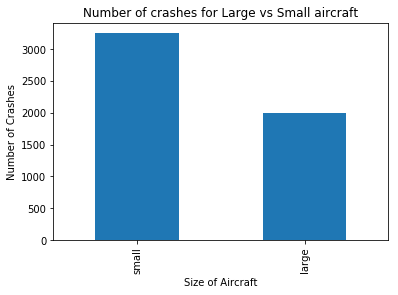

In [59]:

my_plot = test.plot(kind='bar', x='type', y='num_crashes', legend = None, title="Number of crashes for Large vs Small aircraft")

my_plot.set_xlabel('Size of Aircraft')
my_plot.set_ylabel('Number of Crashes')

Comparing number of Small Aircraft crashes vs number of Large Aircraft crashes, using Pie Chart

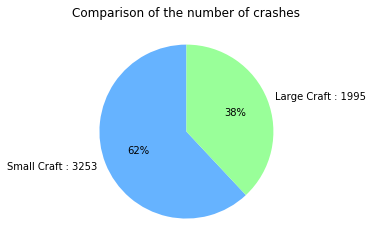

In [60]:
crashes = [3253, 1995]
sizes = ['Small Craft : 3253', 'Large Craft : 1995']
colors = ['#66b3ff','#99ff99']

plt.title("Comparison of the number of crashes")
plt.pie(crashes, labels=sizes, colors=colors, startangle=90, autopct='%.0f%%')
plt.show()


# Is there a difference by day of the week?

Selecting out large aircraft from small aircraft, sorting by the day of the week

In [61]:
conn = sqlite3.connect('airplane_crashes.db')

Large = pd.read_sql_query("SELECT Day, Date, Aboard, Fatalities FROM crashes WHERE Aboard >= 20 ORDER BY Day", conn)
Small = pd.read_sql_query("SELECT Day, Date, Aboard, Fatalities FROM crashes WHERE Aboard < 20 ORDER BY Day", conn)


In [62]:
Large

,Day,Date,Aboard,Fatalities
0,Friday,1913-10-17 00:00:00,30.0,30.0
1,Friday,1915-03-05 00:00:00,41.0,21.0
2,Friday,1916-07-28 00:00:00,20.0,20.0
3,Friday,1917-03-30 00:00:00,23.0,23.0
4,Friday,1918-05-10 00:00:00,22.0,22.0
5,Friday,1940-11-08 00:00:00,29.0,29.0
6,Friday,1942-01-16 00:00:00,22.0,22.0
7,Friday,1943-01-15 00:00:00,35.0,35.0
8,Friday,1943-08-27 00:00:00,21.0,18.0
9,Friday,1943-09-10 00:00:00,22.0,22.0


In [63]:
Small

,Day,Date,Aboard,Fatalities
0,Friday,1912-07-12 00:00:00,5.0,5.0
1,Friday,1915-09-03 00:00:00,19.0,19.0
2,Friday,1920-10-15 00:00:00,1.0,1.0
3,Friday,1920-12-24 00:00:00,1.0,1.0
4,Friday,1921-04-29 00:00:00,1.0,1.0
5,Friday,1922-04-07 00:00:00,7.0,7.0
6,Friday,1923-09-07 00:00:00,1.0,1.0
7,Friday,1923-09-14 00:00:00,6.0,6.0
8,Friday,1924-03-07 00:00:00,1.0,1.0
9,Friday,1924-08-01 00:00:00,1.0,1.0


# Comparing the number of crashes on a given day

In [64]:
conn = sqlite3.connect('airplane_crashes.db')

Day_Large = pd.read_sql_query("SELECT COUNT(*) AS Count, Day as Day FROM crashes WHERE Aboard >= 20 GROUP BY DIndex", conn)
Day_Small = pd.read_sql_query("SELECT COUNT(*) AS Count, Day as Day FROM crashes WHERE Aboard < 20 GROUP BY DIndex", conn)

In [65]:
Day_Large

,Count,Day
0,269,Monday
1,299,Tuesday
2,301,Wednesday
3,295,Thursday
4,296,Friday
5,283,Saturday
6,250,Sunday


In [66]:
Day_Small

,Count,Day
0,441,Monday
1,494,Tuesday
2,491,Wednesday
3,517,Thursday
4,500,Friday
5,454,Saturday
6,356,Sunday


Comparing number of Small Aircraft crashes vs number of Large Aircraft crashes by Day, using Bar Graphs

Text(0, 0.5, 'Number of Crashes')

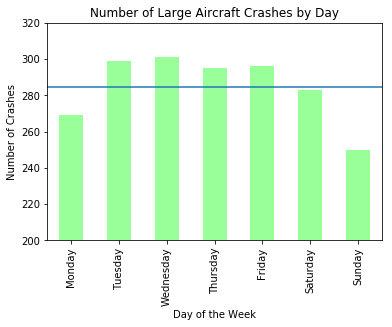

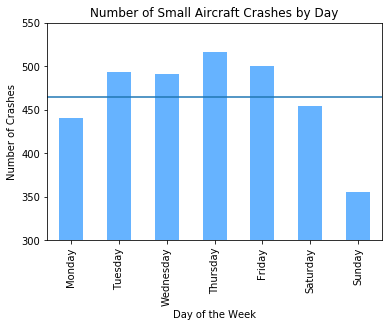

In [67]:
day_large_bar = Day_Large.plot(kind='bar', x='Day', y='Count', color='#99ff99', legend = None, 
                               title="Number of Large Aircraft Crashes by Day")
day_large_bar.set_ylim(200, 320)
day_large_bar.axhline(y=284.7, xmin=0, xmax=1)
day_large_bar.set_xlabel('Day of the Week')
day_large_bar.set_ylabel('Number of Crashes')

day_small_bar = Day_Small.plot(kind='bar', x='Day', y='Count', color='#66b3ff',legend = None, 
                               title="Number of Small Aircraft Crashes by Day")
day_small_bar.set_ylim(300, 550)
day_small_bar.axhline(y=464.7, xmin=0, xmax=1)
day_small_bar.set_xlabel('Day of the Week')
day_small_bar.set_ylabel('Number of Crashes')


In [68]:

conn = sqlite3.connect('airplane_crashes.db')

Line_Combined = pd.read_sql_query("""SELECT 
   Sum( Case WHEN Aboard >= 20 THEN 1 ELSE 0 end) AS 'Day_Large',
   Sum( Case WHEN Aboard < 20 THEN 1 ELSE 0 end) AS 'Day_Small',
   Day 
FROM crashes 
GROUP BY DIndex""", conn)


In [69]:
Line_Combined

,Day_Large,Day_Small,Day
0,269,441,Monday
1,299,494,Tuesday
2,301,491,Wednesday
3,295,517,Thursday
4,296,500,Friday
5,283,454,Saturday
6,250,356,Sunday


Comparing number of Small Aircraft crashes vs number of Large Aircraft crashes, using Line Graphs

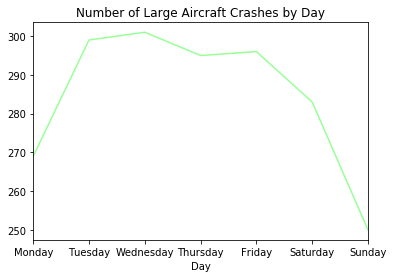

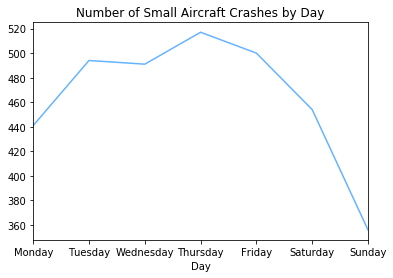

In [70]:
Line_Combined.plot(x='Day', y='Day_Large', color='#99ff99', legend = None, title="Number of Large Aircraft Crashes by Day")
Line_Combined.plot(x='Day', y='Day_Small', color='#66b3ff', legend = None, title="Number of Small Aircraft Crashes by Day")

Combining the two lines in a single chart

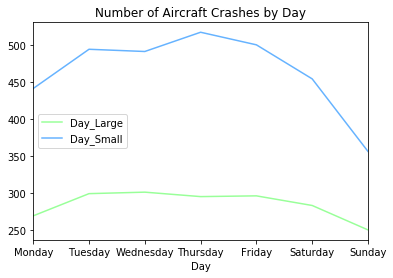

In [71]:
Line_Combined.plot(x='Day', y=['Day_Large', 'Day_Small'], color=['#99ff99', '#66b3ff'], 
                   legend=["Large Aircraft", "Small Aircraft"], title="Number of Aircraft Crashes by Day")


# Is there a correlation between the day of the week and crashes with/without survivors?

In [72]:
conn = sqlite3.connect('airplane_crashes.db')

Better_Survivability = pd.read_sql_query("""
SELECT 
   Sum( Case WHEN Fatalities < Aboard THEN 1 ELSE 0 end ) AS 'With Survivors',
   Sum(Case WHEN Fatalities = Aboard THEN 1 ELSE 0 end) AS 'Without Survivors',
   Count(*) AS 'Total Crashes', 
   Day 
FROM crashes 
GROUP BY DIndex
""", conn)


In [73]:
Better_Survivability

,With Survivors,Without Survivors,Total Crashes,Day
0,231,479,713,Monday
1,262,531,796,Tuesday
2,243,549,796,Wednesday
3,271,541,818,Thursday
4,255,541,797,Friday
5,254,483,741,Saturday
6,216,390,607,Sunday


Comparing the number of crashes with survivors versus without, based on day of the week, using bar graphs

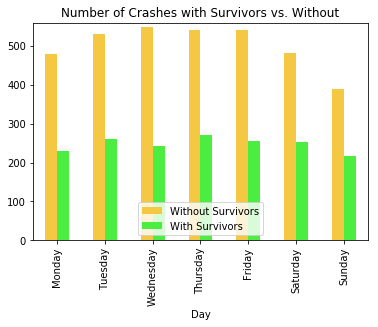

In [74]:
Survivability = Better_Survivability.plot.bar(x='Day', y=['Without Survivors','With Survivors'], color=['#f4c842','#4bed40'], 
                                              title="Number of Crashes with Survivors vs. Without")
Survivability.set_ylim(0, 560)
Survivability.legend(loc='lower center')
